<a href="https://colab.research.google.com/github/ritaprova/Machile-learning-/blob/main/26_12_EDA_bicycle__counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Fremont_Bridge_Bicycle_Counter.csv",index_col="Date",parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [3]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,137777.000000,137777.000000,137777.000000
mean,112.490771,51.267004,61.223767
std,143.132406,65.992109,89.076846
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


Text(0, 0.5, 'hourly bivcycle count')

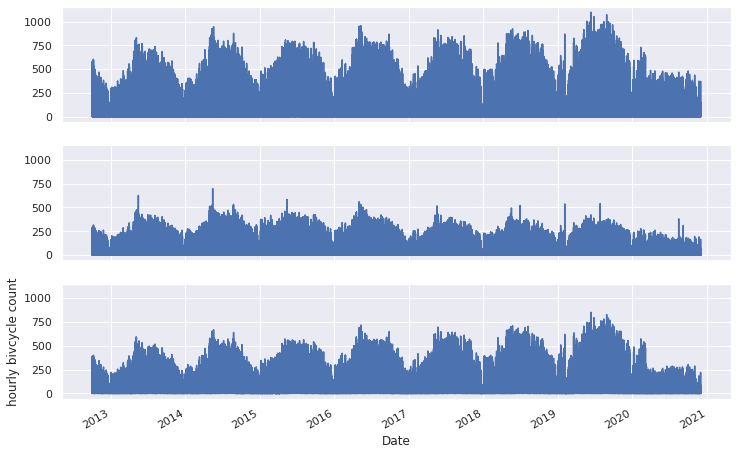

In [28]:
sns.set()
fig,ax = plt.subplots(3,sharex=True,sharey=True)
#total
data["Fremont Bridge Total"].plot(figsize=(12,8),ax=ax[0])
#East
data["Fremont Bridge East Sidewalk"].plot(figsize=(12,8),ax=ax[1])
#west
data["Fremont Bridge West Sidewalk"].plot(figsize=(12,8),ax=ax[2])
plt.ylabel("hourly bivcycle count")

Text(0, 0.5, 'weekly bicycle count')

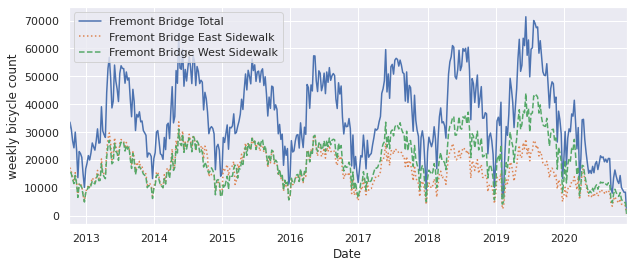

In [41]:
#resampling according to week and taking a look at that 
weekly = data.resample("w").sum()
weekly.plot(style=["-",":","--"],figsize=(10,4))
plt.ylabel("weekly bicycle count")

Text(0, 0.5, 'mean_count_by_day_of_week ')

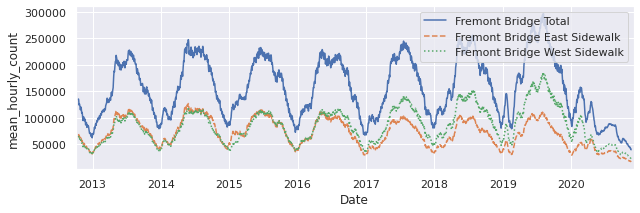

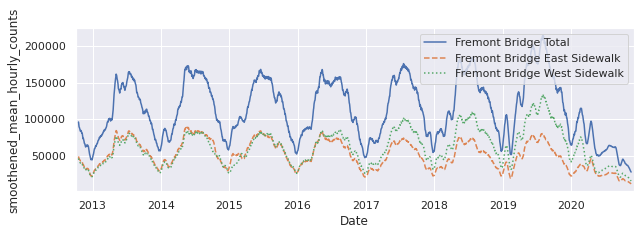

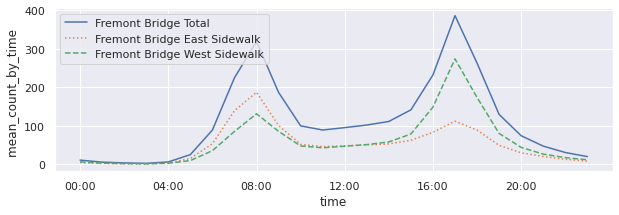

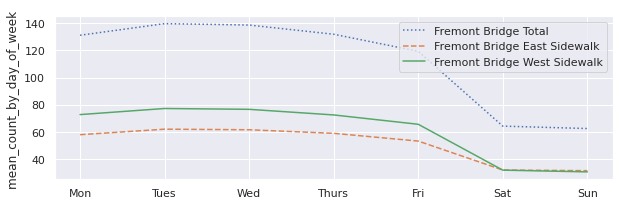

In [47]:
#using a rolling mean
daily = data.resample("D").sum()
daily.rolling(30,center=True).sum().plot(style=["-","--",":"],figsize=(10,3))
plt.ylabel("mean_hourly_count")

#using a gaussian window to smoothen the jaggedness
daily.rolling(30,center=True,win_type="gaussian").sum(std=10).plot(style=["-","--",":"],figsize=(10,3))
plt.ylabel("smoothened_mean_hourly_counts")

#looking at the avg traffic as a function of the time of the day 
time_mean_b = data.groupby(data.index.time).mean()
hours = 4*60*60*np.arange(6)
time_mean_b.plot(xticks=hours,style=["-",":","--"],figsize=(10,3))
plt.ylabel("mean_count_by_time ")

#grouping by weekdays 
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'],figsize=(10,3));
plt.ylabel("mean_count_by_day_of_week ")

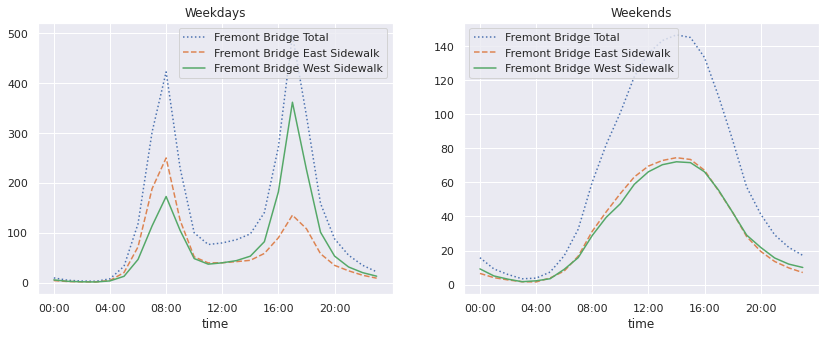

In [56]:
#using a compound groupby
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
xticks=hours, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
xticks=hours, style=[':', '--', '-']);